<p style="font-size: 28px; color: #2c2c2c; font-family: 'serif'; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.4); text-align: center; background-color: #f5f5f5; border-radius: 4px; padding: 10px; margin: auto;
">
<strong>بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ</strong>
</p>


<p style="font-size: 28px; color: #2c2c2c; font-family: 'Times New Roman'; text-align: left; background-color: #f5f5f5; border-radius: 4px; padding: 10px; border-left: 6px solid #555;">
<strong>Customer Churn Prediction</strong> <br>
  <span style="text-align: center; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.4); font-family: 'Times New Roman'; color: #2c2c2c; font-size: 14px; width: fit-content;
">BY: Omar Abdelaal</span>
</p>

## **Dataset**
- The dataset is the details of the customers in a company.  
- The column are about it's estimated salary, age, sex, etc. Aiming to provide all details about an employee.  
- Based upon data of employees of a bank we calculate whether a employee stands a chance to stay in the company or not.

## **Columns**
- **`RowNumber`:** The number of the row  

- **`CustomerId`:** The unique customer id  

- **`Surname`:** Customers Surname  

- **`CreditScore`:** Their credit score  

- **`Geography`:** Which Country they belong to  

- **`Gender`:** Their Gender  

- **`Age`:** Age  

- **`Tenure`:** The time of bond with company  

- **`Balance`:** The amount left with them  

- **`NumOfProducts`:** The products they own  

- **`HasCrCard`:** Do they have a credit card or not  

- **`IsActiveMember`:** How active member they are  

- **`EstimatedSalary`:** Their estimated salary  

- **`Exited`:** Whether they stay in the or leave  

<p style="font-size: 28px; color: #2c2c2c; font-family: 'Times New Roman'; text-align: left; background-color: #f5f5f5; border-radius: 4px; padding: 10px; border-left: 6px solid #555;">
<strong>Importing Libraries</strong>
</p>

In [27]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.under_sampling import TomekLinks
import optuna

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, balanced_accuracy_score

import warnings
warnings.filterwarnings('ignore')

<p style="font-size: 28px; color: #2c2c2c; font-family: 'Times New Roman'; text-align: left; background-color: #f5f5f5; border-radius: 4px; padding: 10px; border-left: 6px solid #555;">
<strong>Exploratory Data Analysis(EDA)</strong>
</p>

## **`|` Understand the Data**

In [28]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [29]:
df.shape

(10000, 14)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [31]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [32]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 1296.94it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **`|` Data Cleaning**

In [33]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
label_encoder = preprocessing.LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Geography'] = label_encoder.fit_transform(df[['Geography']])
df

RowNumber  CustomerId    Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602   Hargrave          619          0       0   42   
1             2    15647311       Hill          608          2       0   41   
2             3    15619304       Onio          502          0       0   42   
3             4    15701354       Boni          699          0       0   39   
4             5    15737888   Mitchell          850          2       0   43   
...         ...         ...        ...          ...        ...     ...  ...   
9995       9996    15606229   Obijiaku          771          0       1   39   
9996       9997    15569892  Johnstone          516          0       1   35   
9997       9998    15584532        Liu          709          0       0   36   
9998       9999    15682355  Sabbatini          772          1       1   42   
9999      10000    15628319     Walker          792          0       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [36]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

## **`|` Univariate Analysis**

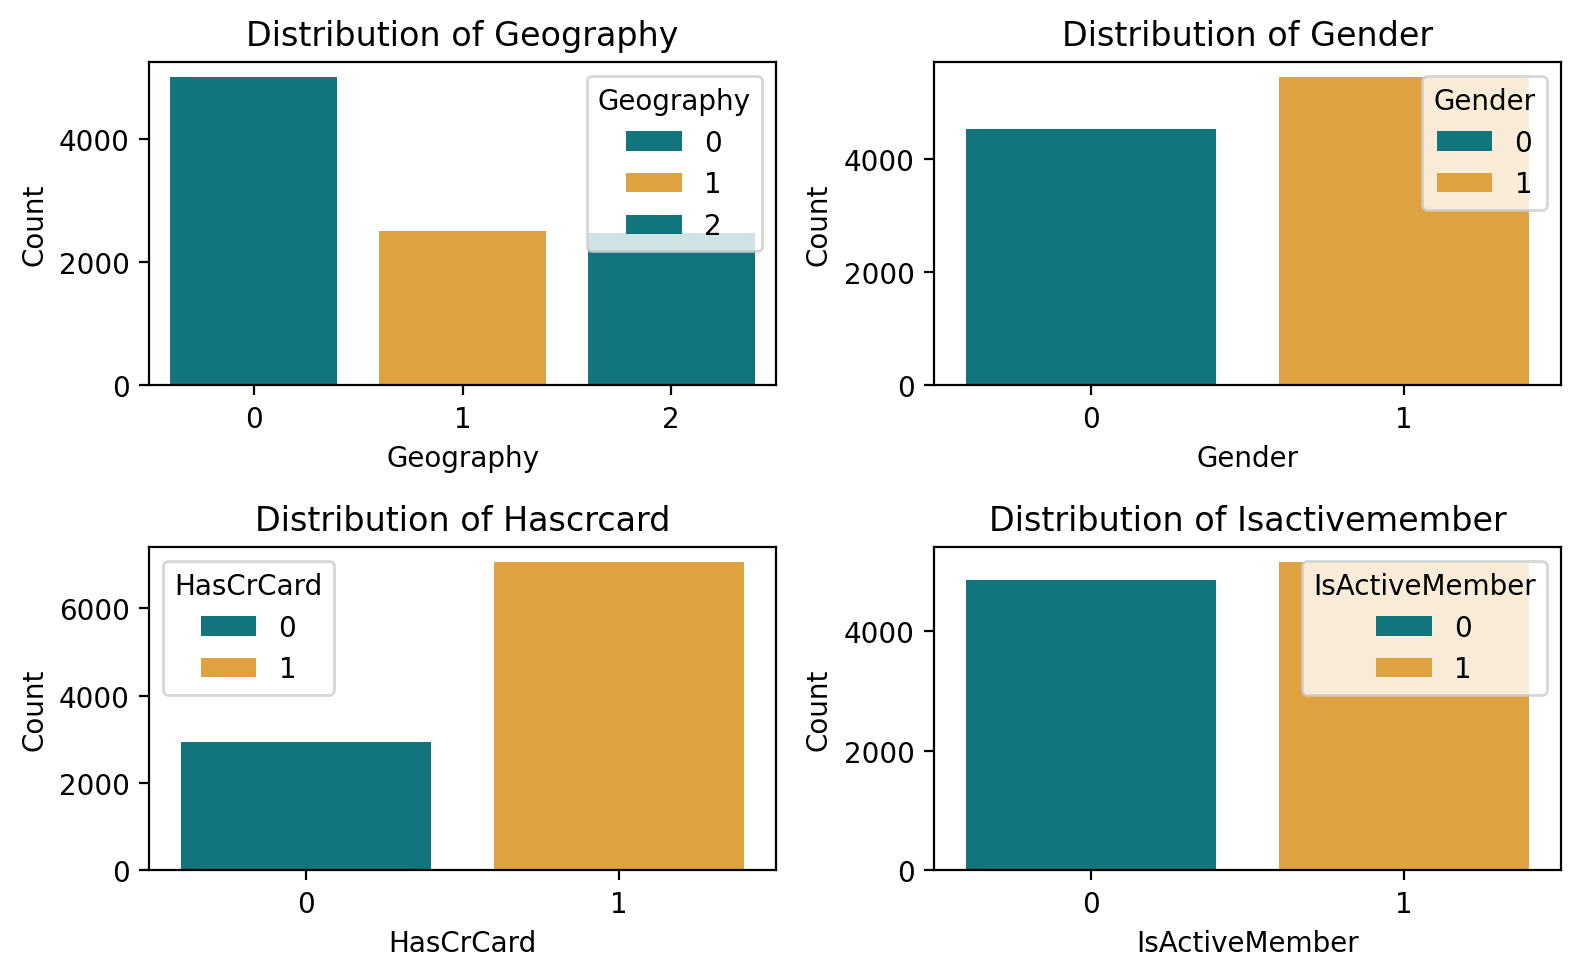

In [37]:
features = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]

plt.figure(figsize=(8, 5))
for feature in features:
    plt.subplot(2, 2, features.index(feature) + 1)
    sns.countplot(x=feature, data=df, hue=feature, palette=["#00838f", "#f9a825"])
    plt.title(f"Distribution of {feature.replace('_', ' ').title()}")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

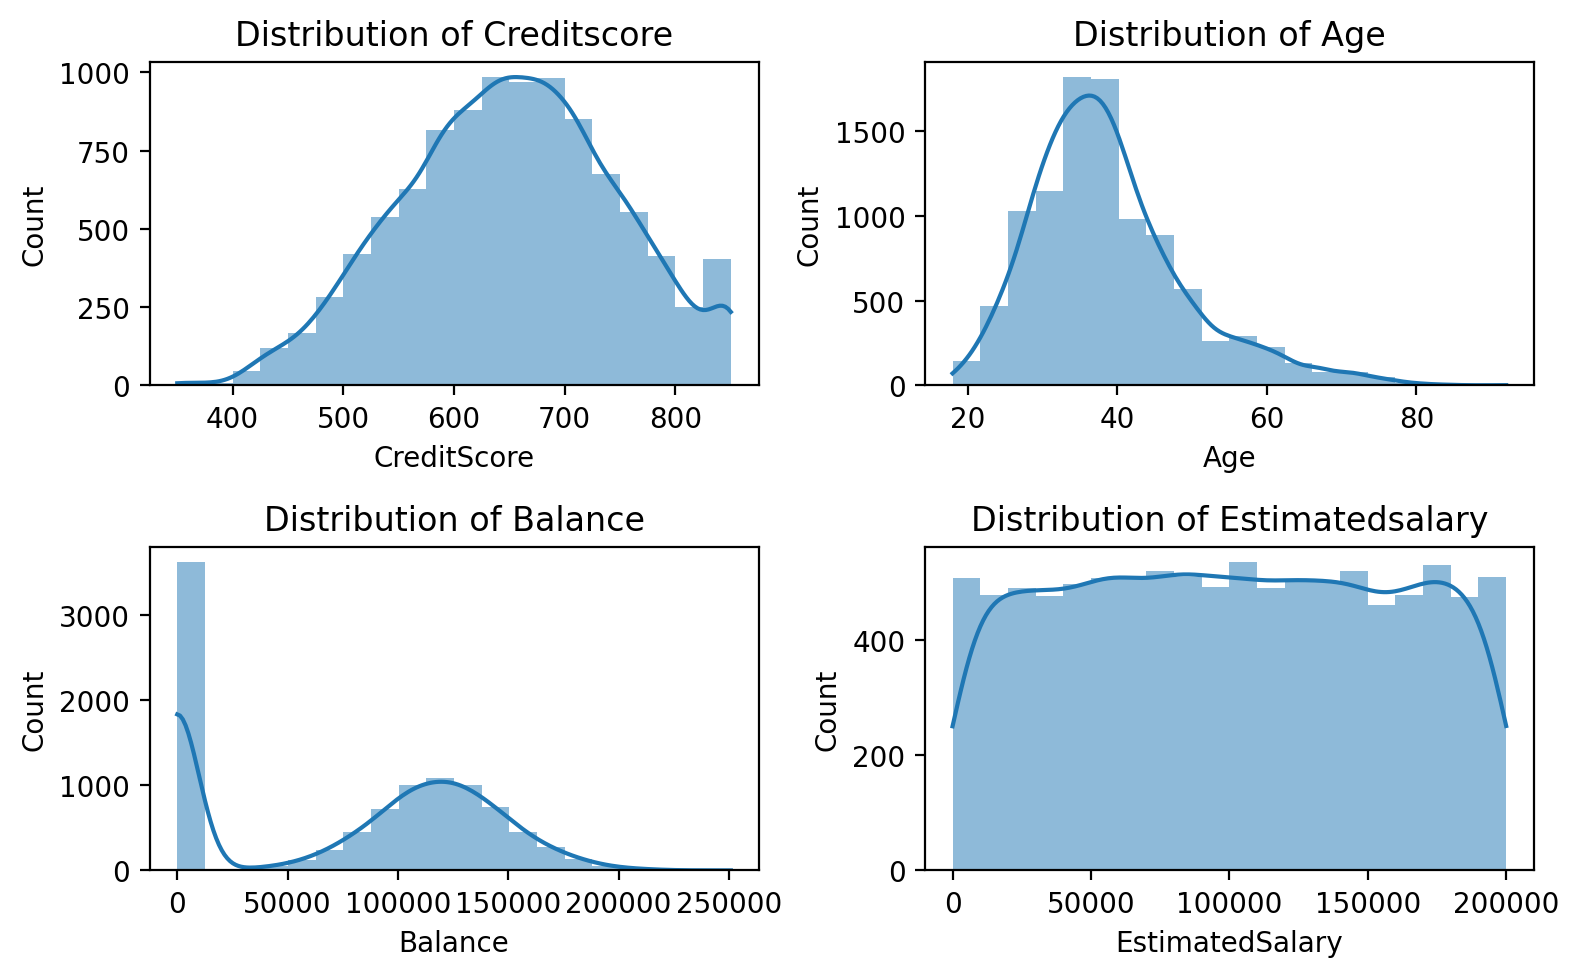

In [38]:
features2 = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(8, 5))
for feature in features2:
    plt.subplot(2, 2, features2.index(feature) + 1)
    sns.histplot(x=feature, data=df, bins=20, kde=True, edgecolor=None)
    plt.title(f"Distribution of {feature.replace('_', ' ').title()}")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

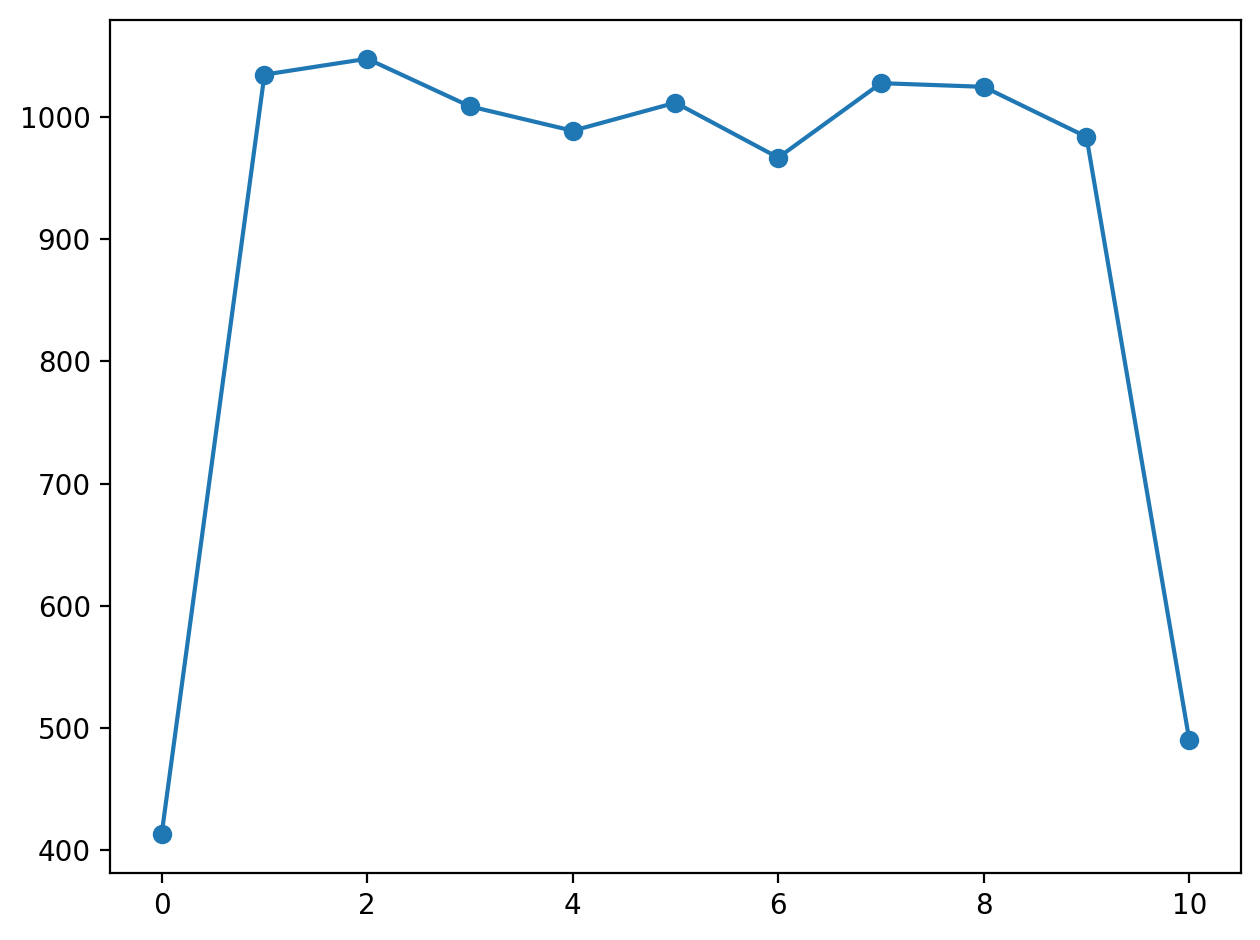

In [39]:
plt.plot(df['Tenure'].value_counts().sort_index(), marker='o')
plt.tight_layout()
plt.show()

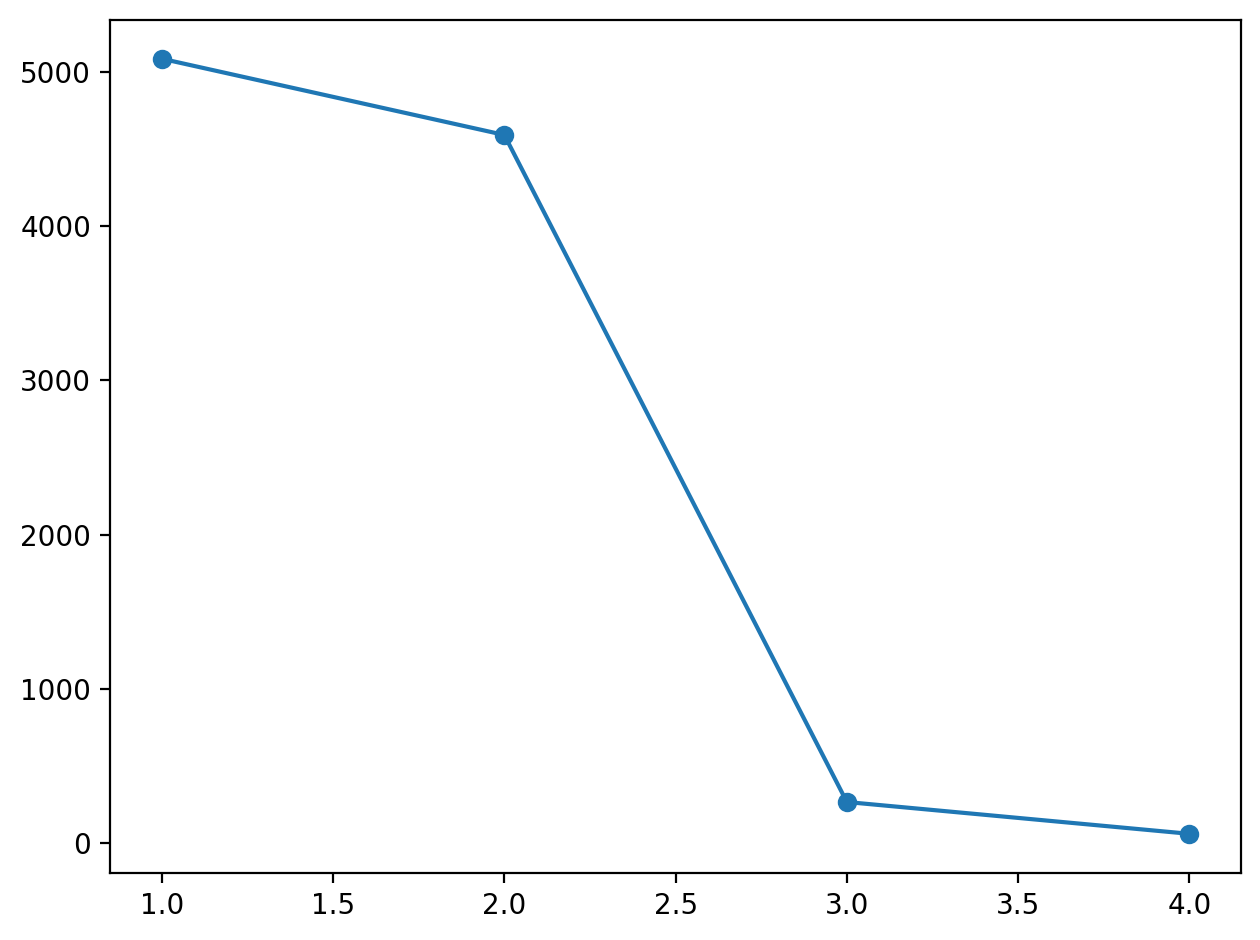

In [40]:
plt.plot(df['NumOfProducts'].value_counts().sort_index(), marker='o')
plt.tight_layout()
plt.show()

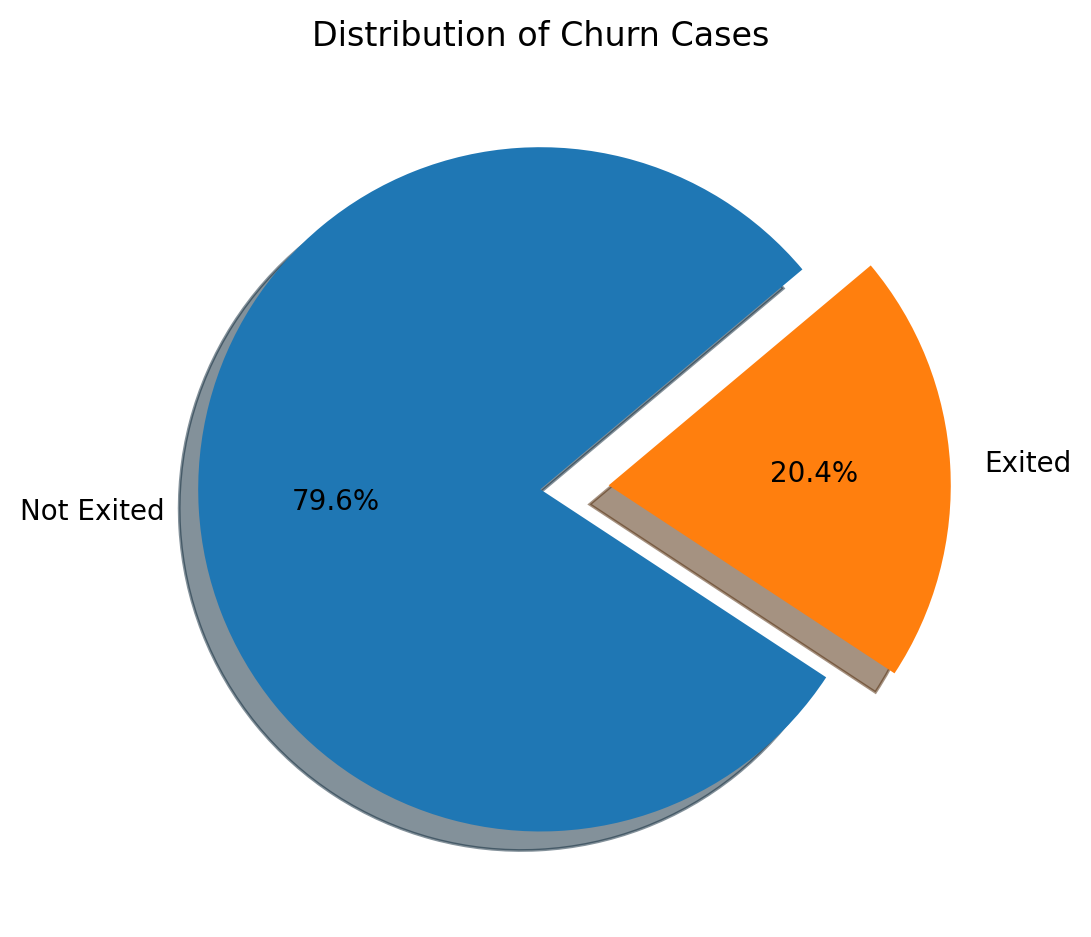

In [41]:
plt.pie(df["Exited"].value_counts(), labels=["Not Exited", "Exited"], autopct='%1.1f%%', startangle=40, explode=[0, 0.2], shadow=True)
plt.title("Distribution of Churn Cases")
plt.tight_layout()
plt.show()

## **`|` Bivariate Analysis**

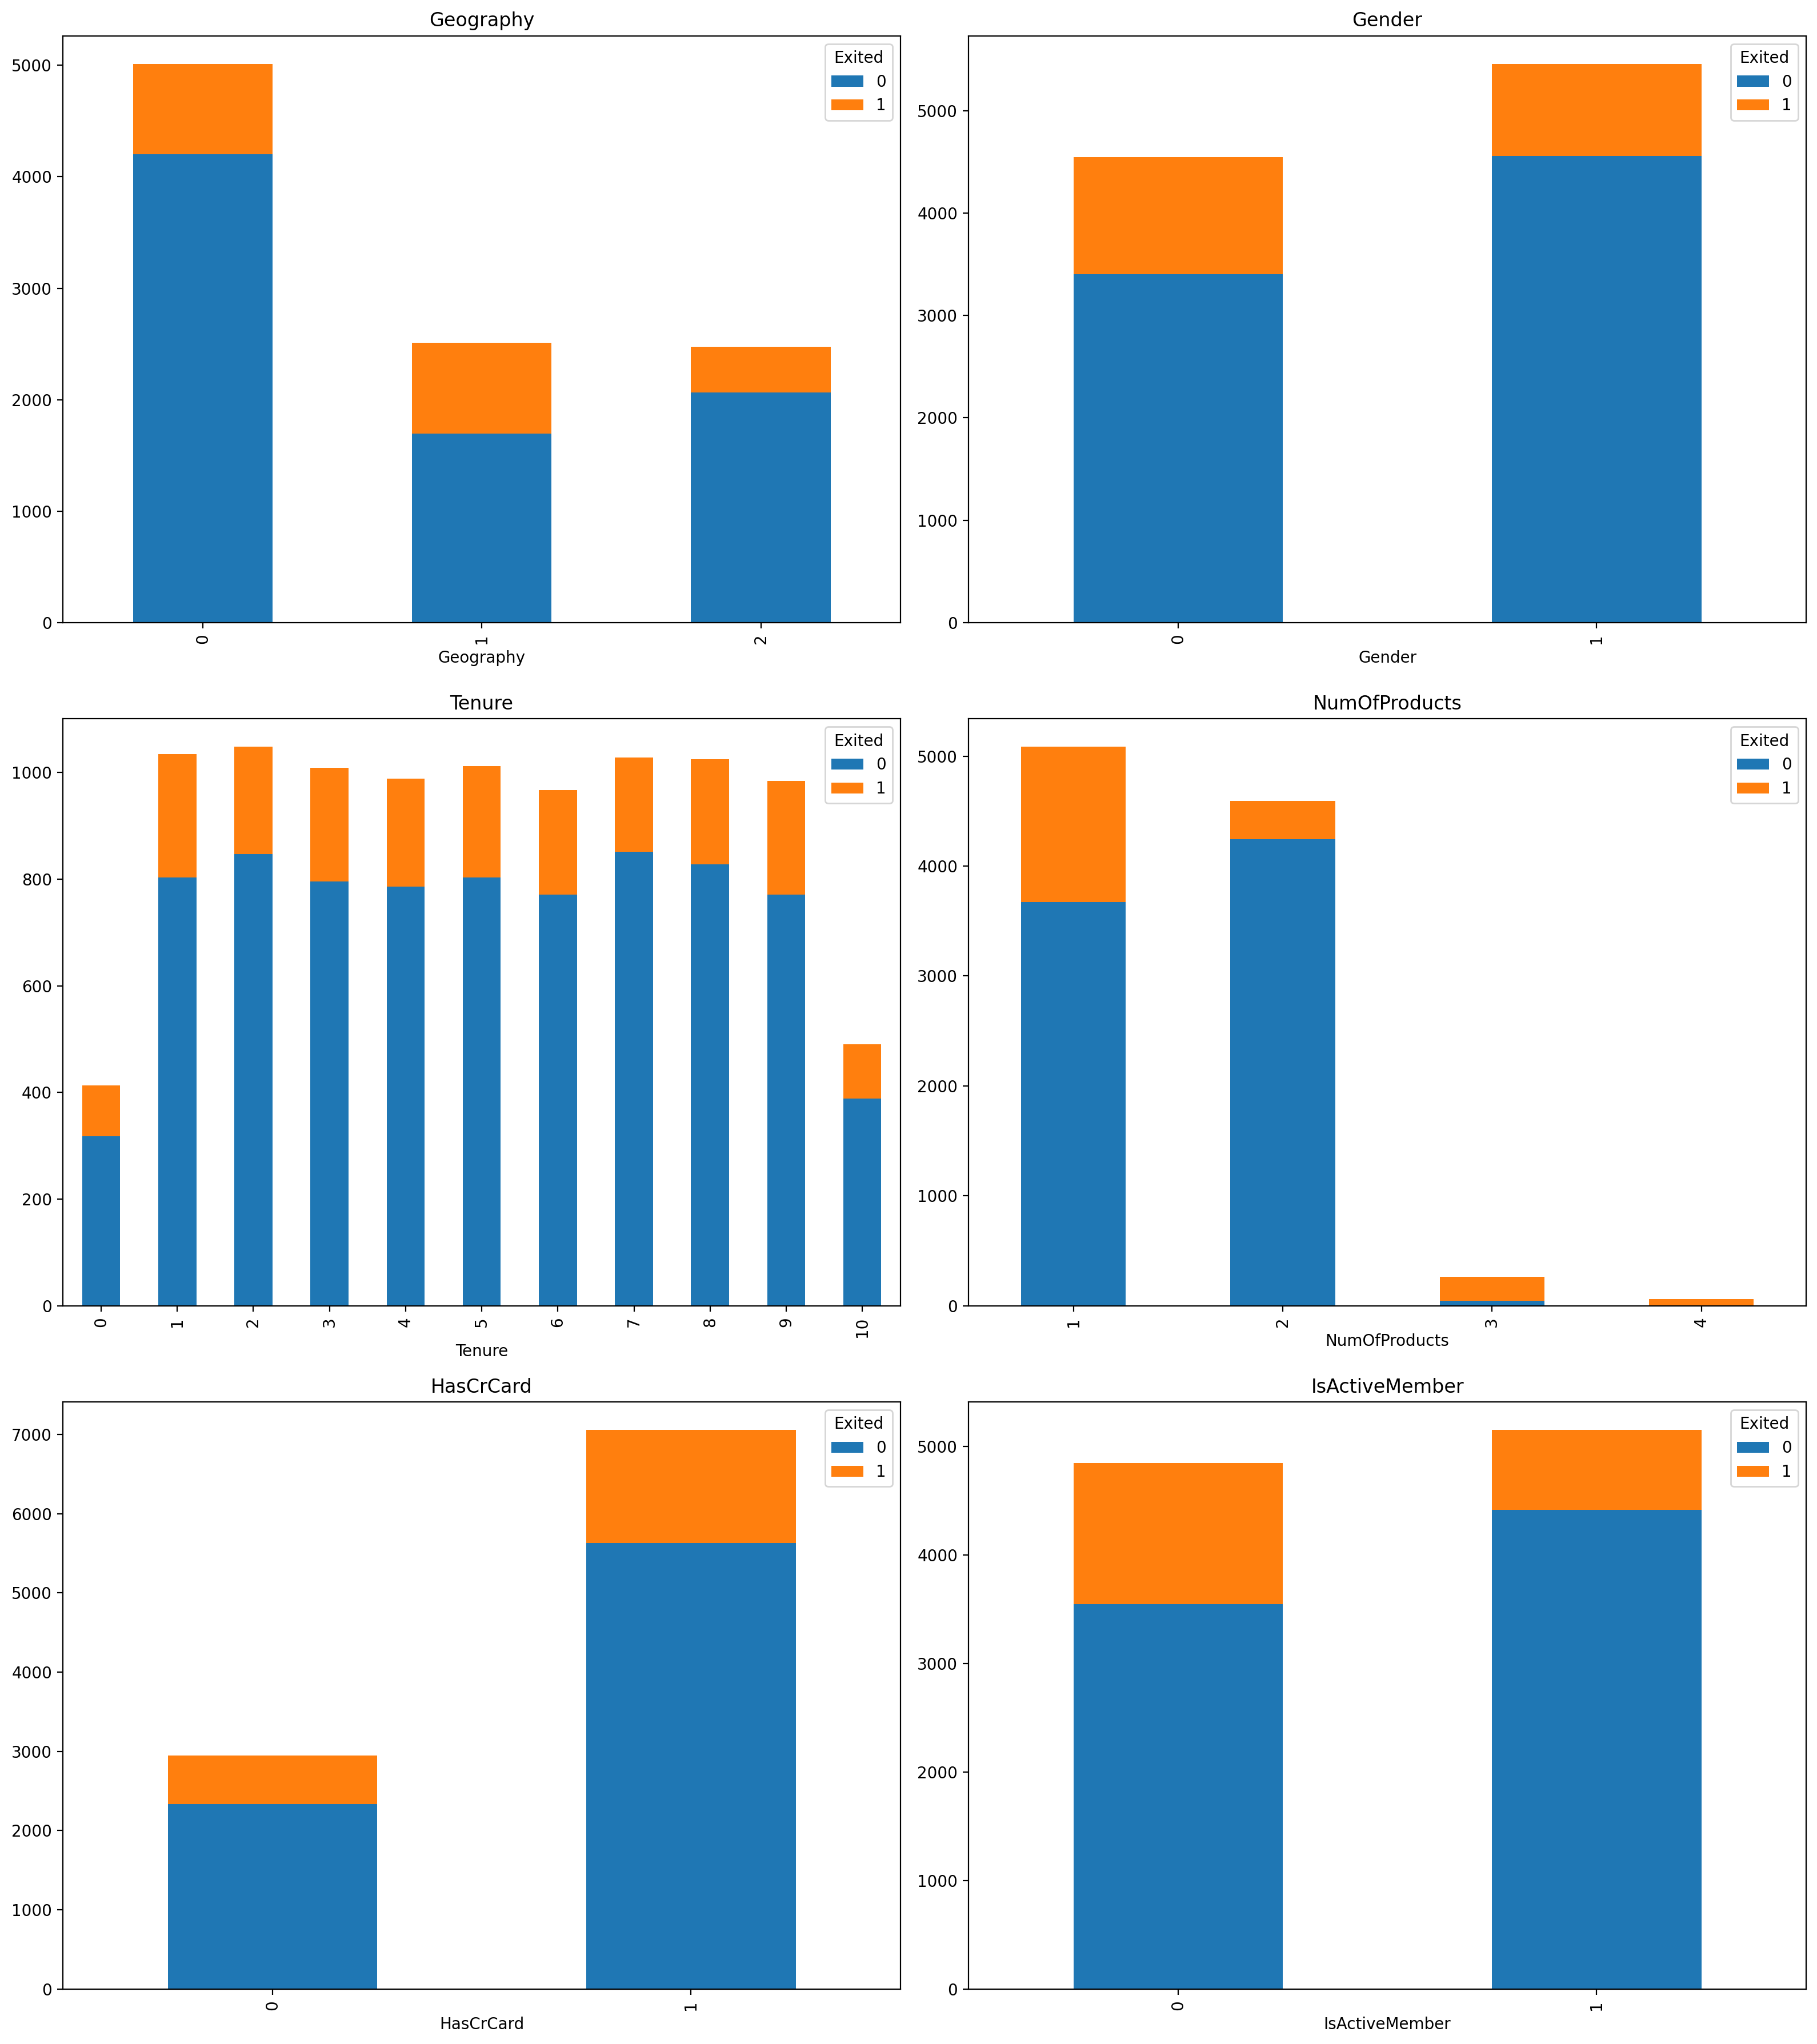

In [42]:
fig, ax = plt.subplots(3, 2, figsize=(16, 18))
ax = ax.ravel()

for a, c in zip(ax, ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']):
    df.groupby(c)['Exited'].value_counts().unstack().plot(kind='bar', stacked=True, ax=a, title=c)

plt.tight_layout()
plt.show()

## **`|` Multivariate Analysis**

<Axes: xlabel='CreditScore', ylabel='Age'>

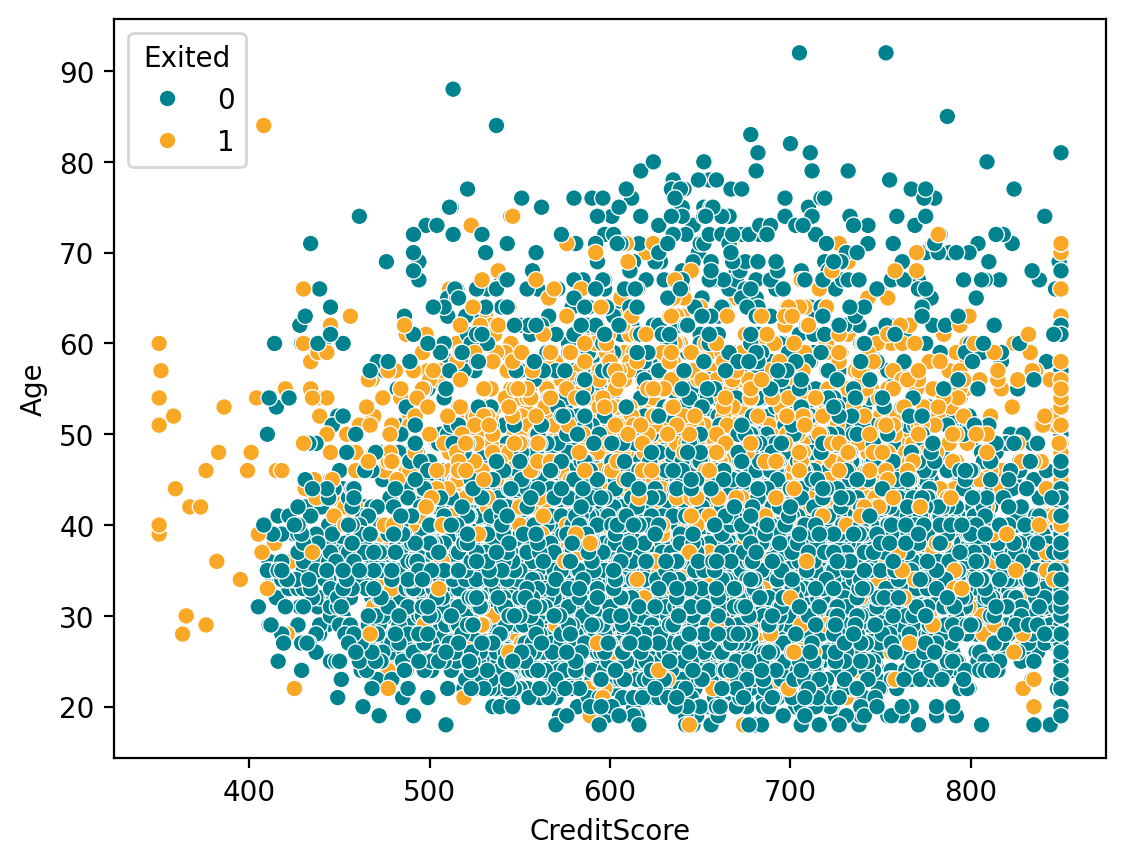

In [43]:
sns.scatterplot(x='CreditScore', y='Age', hue='Exited', data=df, palette=["#00838f", "#f9a825"])

Text(0.5, 1.0, 'correlation of feature')

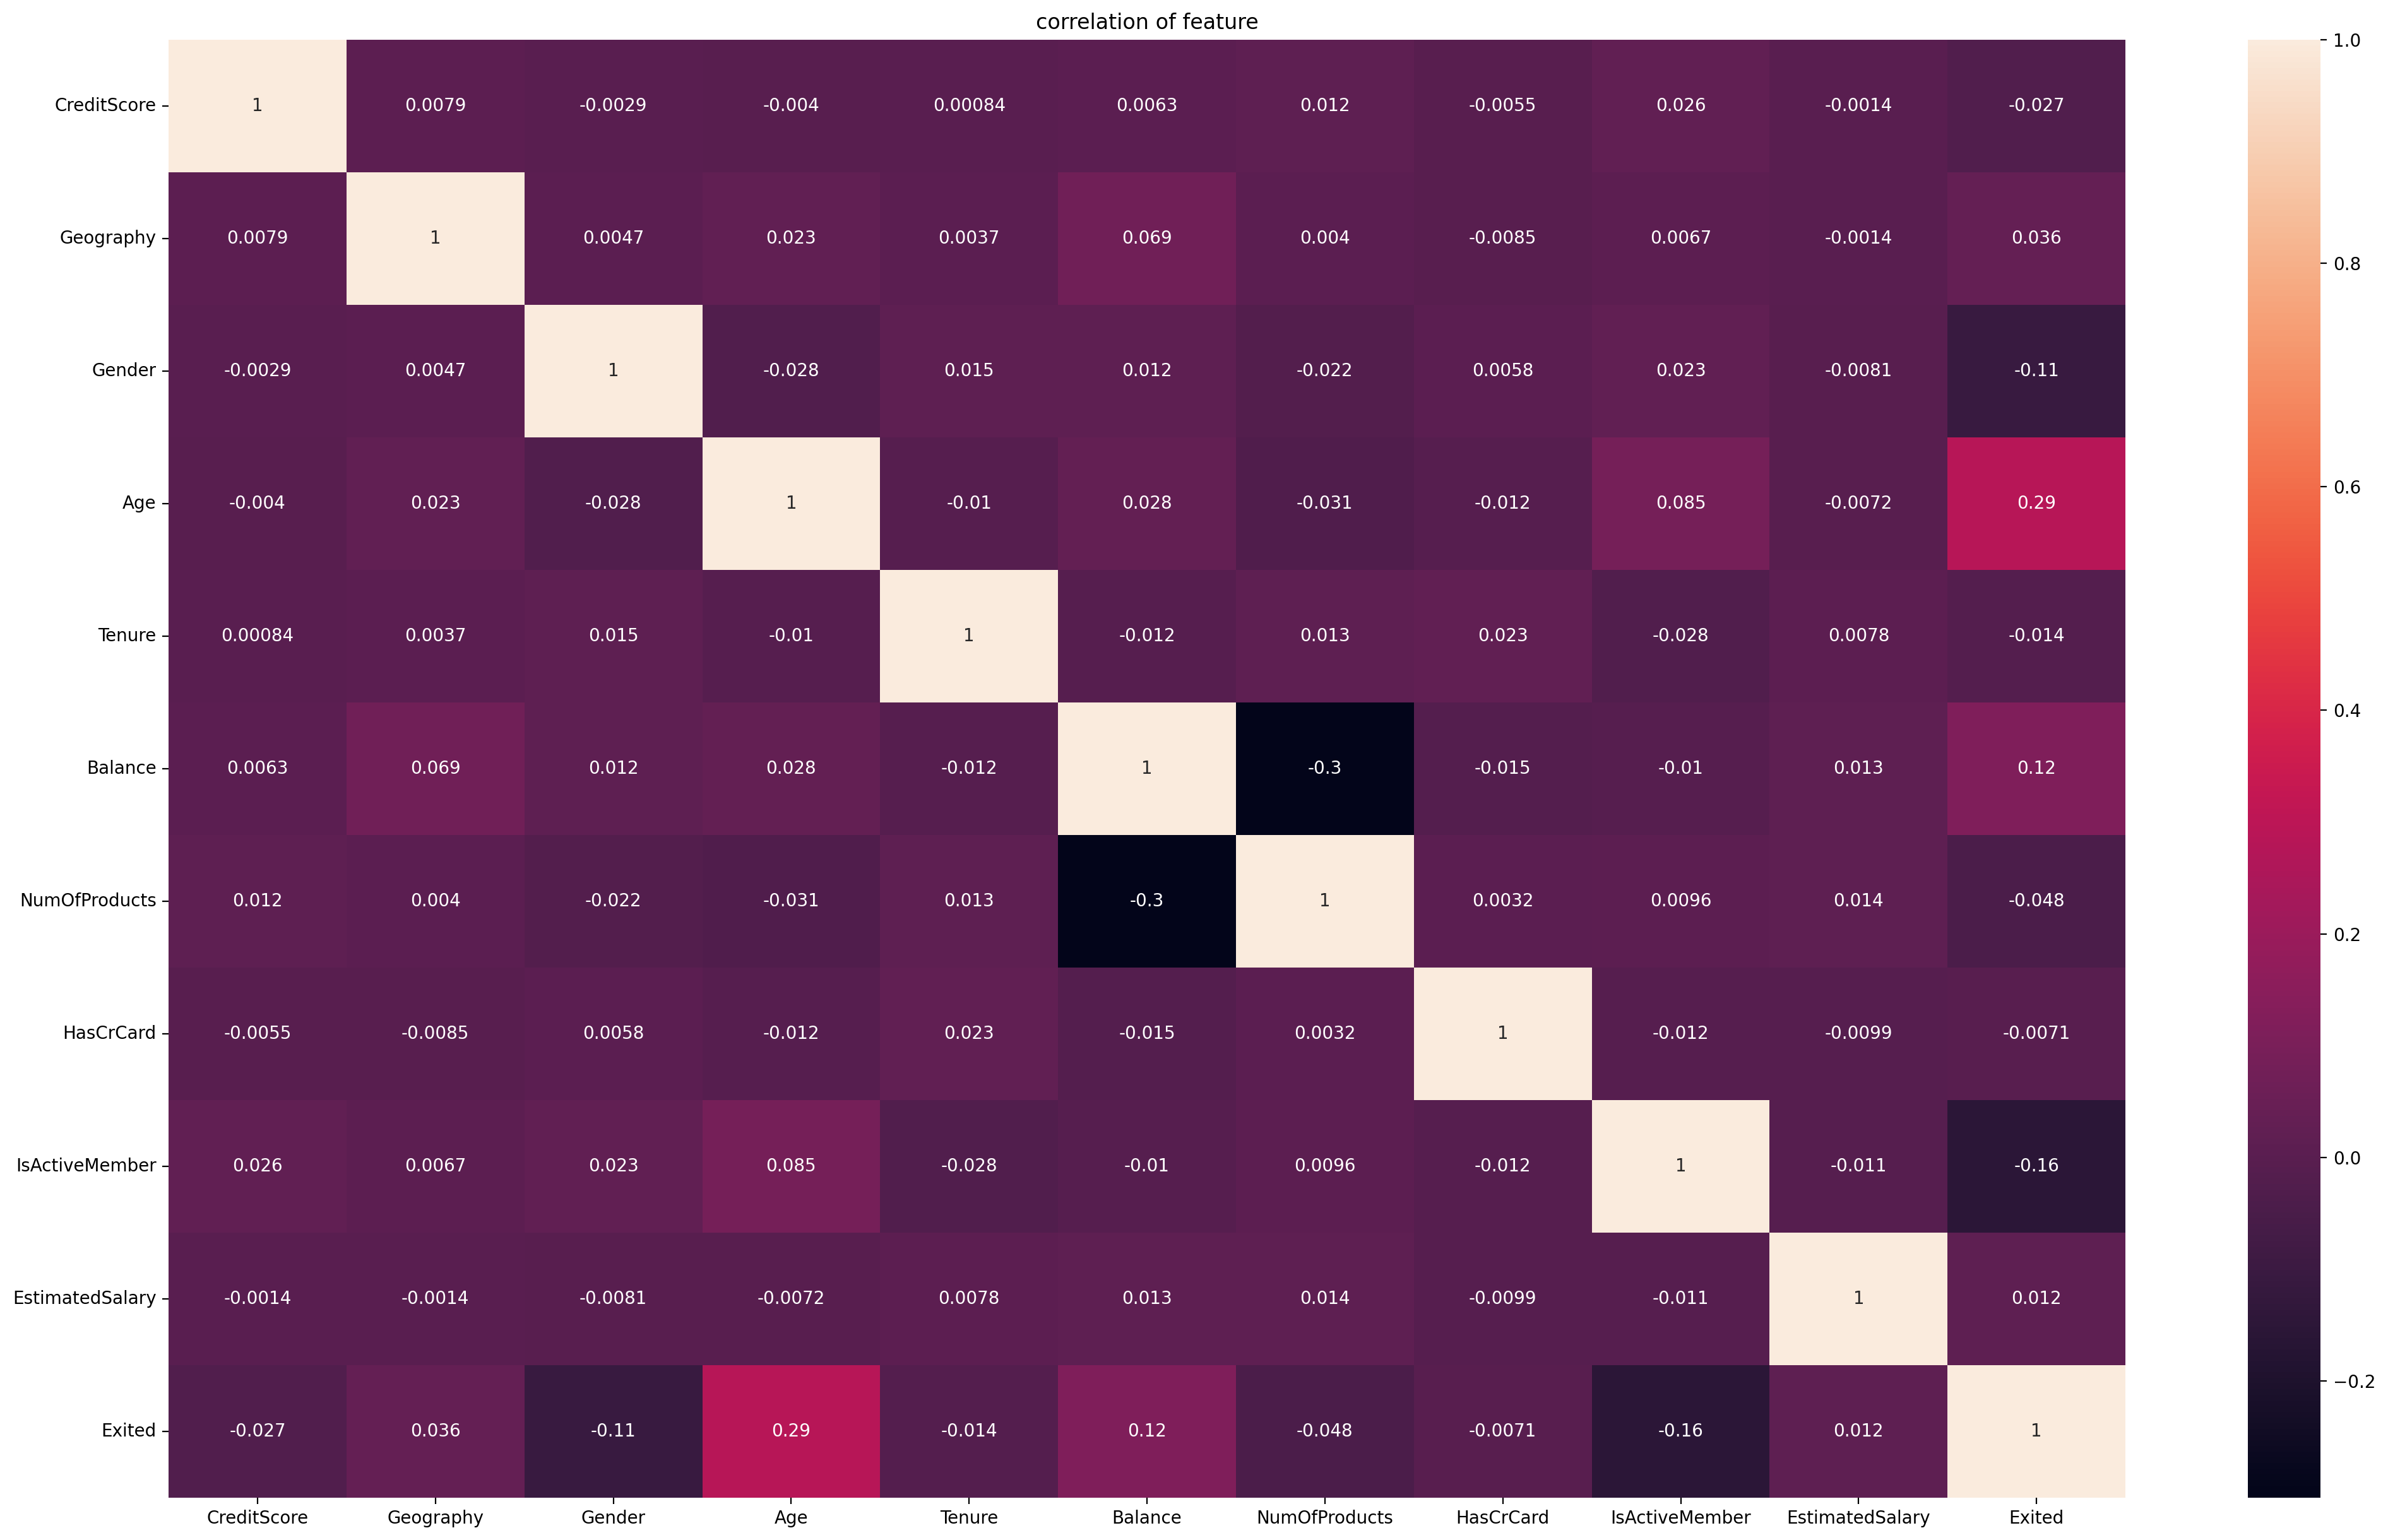

In [44]:
plt.figure(figsize = (25,15))
sns.heatmap(df.corr(),annot=True)
plt.title("correlation of feature")

In [45]:
data = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

z_scores = np.abs(stats.zscore(data))
threshold = 5
df = df[(z_scores < threshold).all(axis=1)]
df

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[9998 rows x 11 columns]

## **`|` EDA Summery**

- This dataset is used for customer churn prediction, where the objective is to predict whether a customer exits the bank. The target variable is Exited, making this a binary classification problem.  

- The dataset contains 10,000 rows and 14 columns.  

- Features include a mix of integer, floating-point, and categorical (object) variables, representing customer demographics, account information, and banking behavior.

- Several columns (RowNumber, CustomerId, and Surname) were identified as non-informative identifiers and are not useful for modeling, as they do not carry predictive information about customer churn.

- The dataset is clean and well-prepared:

- No missing values were found.

- No duplicate records exist.

- Only two outliers were detected across the entire dataset, indicating minimal noise.

- No inconsistent or invalid values were observed.

- Overall, the data quality is high and requires minimal preprocessing.

- The target variable Exited is imbalanced:

- Approximately 20.4% of customers have exited.

- Around 79.6% of customers have remained.

- The Balance feature shows a strong dominance of zero values, indicating that a large portion of customers have no account balance.

- features show a linear relationship with customer churn:
    - Age
    - Balance
    - Gender

- Customers with three or more products show a significantly higher tendency to leave the bank.

- The majority of customers are French, while German customers, although fewer in number, exhibit a relatively high churn rate.

<p style="font-size: 28px; color: #2c2c2c; font-family: 'Times New Roman'; text-align: left; background-color: #f5f5f5; border-radius: 4px; padding: 10px; border-left: 6px solid #555;">
<strong>Building Models</strong>
</p>

## **`|` Data Preparation**

In [46]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7998, 10), (2000, 10), (7998,), (2000,))

In [48]:
def evaluate_model(model, X_test, y_test, threshold=0.5, show_report=True):
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba > threshold).astype(int)

    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    confusion = confusion_matrix(y_test, y_pred)

    print(f"Accuracy:          {acc:.4f}")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"F1 Score:          {f1:.4f}")
    print(f"ROC AUC:           {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(confusion)

    if show_report:
        print("\n" + classification_report(y_test, y_pred, digits=3))

    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.show()


## **`|` Models**

In [49]:
sampler = TomekLinks(n_jobs=-1)

X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)
X_train_res.shape, y_train_res.shape

((7203, 10), (7203,))

In [50]:
scaler = StandardScaler()
X_train_res_s = scaler.fit_transform(X_train_res)
X_test_s = scaler.transform(X_test)

## **`|` XGBoost**

In [51]:
def objective_xgboost(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 14),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "tree_method": "hist",
        "random_state": 42,
        "n_jobs": -1,
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    X_res = X_train_res.values if hasattr(X_train_res, "values") else X_train_res
    y_res = y_train_res.values if hasattr(y_train_res, "values") else y_train_res

    for tr_idx, val_idx in cv.split(X_res, y_res):
        X_tr, X_val = X_res[tr_idx], X_res[val_idx]
        y_tr, y_val = y_res[tr_idx], y_res[val_idx]

        model = xgb.XGBClassifier(**params)
        model.fit(X_tr, y_tr, verbose=False)

        y_pred = model.predict(X_val)
        f1_scores.append(f1_score(y_val, y_pred))

    return np.mean(f1_scores)


In [52]:
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgboost, n_trials=50)

[I 2026-01-01 20:55:40,665] A new study created in memory with name: no-name-cc56b31a-6799-4b7a-a9e8-b1890001f9c3
[I 2026-01-01 20:55:41,987] Trial 0 finished with value: 0.5307922599351113 and parameters: {'n_estimators': 118, 'learning_rate': 0.015735831846738546, 'max_depth': 14, 'subsample': 0.5459451454519022, 'colsample_bytree': 0.6536384003086118, 'reg_alpha': 0.6746891631207715, 'reg_lambda': 0.00938573179343094}. Best is trial 0 with value: 0.5307922599351113.
[I 2026-01-01 20:55:42,314] Trial 1 finished with value: 0.6015134124696337 and parameters: {'n_estimators': 132, 'learning_rate': 0.1485769630321816, 'max_depth': 3, 'subsample': 0.7941387505590531, 'colsample_bytree': 0.8548405838101538, 'reg_alpha': 0.2516047235092477, 'reg_lambda': 0.6607355376584976}. Best is trial 1 with value: 0.6015134124696337.
[I 2026-01-01 20:55:43,588] Trial 2 finished with value: 0.5875166290903996 and parameters: {'n_estimators': 203, 'learning_rate': 0.13256804657746693, 'max_depth': 8, 's

In [53]:
best_xgb_params = study_xgb.best_params
print("Best F1:", study_xgb.best_value)
print(best_xgb_params)

Best F1: 0.610392854361605
{'n_estimators': 600, 'learning_rate': 0.05967273605827131, 'max_depth': 3, 'subsample': 0.9061085558851262, 'colsample_bytree': 0.7210651539849925, 'reg_alpha': 0.8192538736119569, 'reg_lambda': 0.324479225067682}


In [54]:
optuna.visualization.plot_param_importances(study_xgb).show()
optuna.visualization.plot_optimization_history(study_xgb).show()

In [55]:
final_xgb = xgb.XGBClassifier(
    **best_xgb_params,
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

In [56]:
final_xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7210651539849925, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05967273605827131,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=-1,
              num_parallel_tree=None, ...)

In [57]:
y_proba_xgb = final_xgb.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)
best_f1, best_t = 0, 0

for t in thresholds:
    preds = (y_proba_xgb > t).astype(int)
    score = f1_score(y_test, preds)
    if score > best_f1:
        best_f1, best_t = score, t

print(f"Best Threshold: {best_t:.2f}")
print(f"Best F1 Score:  {best_f1:.4f}")

Best Threshold: 0.35
Best F1 Score:  0.6199


Accuracy:          0.8430
Balanced Accuracy: 0.7633
F1 Score:          0.6199
ROC AUC:           0.8550
Confusion Matrix:
[[1430  163]
 [ 151  256]]

              precision    recall  f1-score   support

           0      0.904     0.898     0.901      1593
           1      0.611     0.629     0.620       407

    accuracy                          0.843      2000
   macro avg      0.758     0.763     0.760      2000
weighted avg      0.845     0.843     0.844      2000



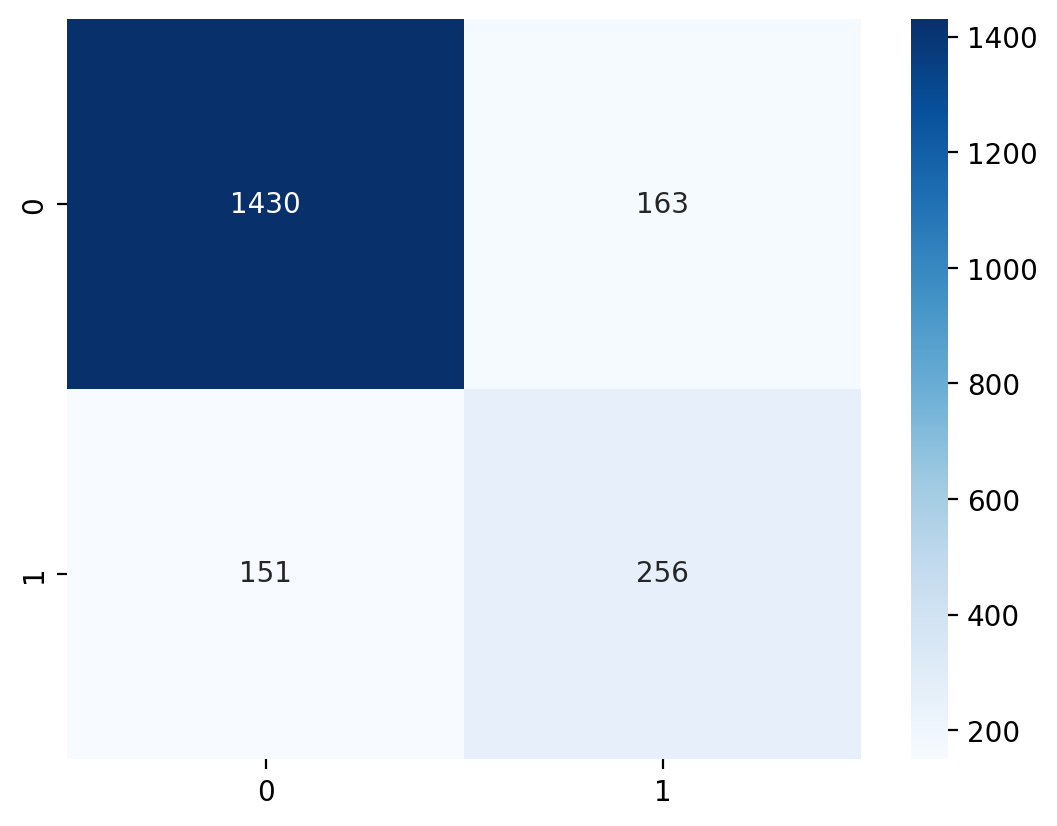

In [58]:
y_pred_xgb = evaluate_model(final_xgb, X_test, y_test, threshold=best_t)

## **`|` Random Forest**

In [59]:
def objective_randomforest(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "class_weight": "balanced",
        "random_state": 42,
        "n_jobs": -1,
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []

    X_res = X_train_res.values if hasattr(X_train_res, "values") else X_train_res
    y_res = y_train_res.values if hasattr(y_train_res, "values") else y_train_res

    for train_idx, valid_idx in cv.split(X_res, y_res):
        X_tr, X_val = X_res[train_idx], X_res[valid_idx]
        y_tr, y_val = y_res[train_idx], y_res[valid_idx]

        model = RandomForestClassifier(**params)
        model.fit(X_tr, y_tr)

        y_pred = model.predict_proba(X_val)[:, 1]
        auc_scores.append(roc_auc_score(y_val, y_pred))

    return np.mean(auc_scores)


In [60]:
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_randomforest, n_trials=50)


[I 2026-01-01 20:57:43,468] A new study created in memory with name: no-name-874d375e-a898-403f-b7b8-7624428a0ce3
[I 2026-01-01 20:57:44,914] Trial 0 finished with value: 0.8569577183451887 and parameters: {'n_estimators': 171, 'max_depth': 28, 'min_samples_split': 13, 'min_samples_leaf': 18, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8569577183451887.
[I 2026-01-01 20:57:49,629] Trial 1 finished with value: 0.8617479394971737 and parameters: {'n_estimators': 563, 'max_depth': 23, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 1 with value: 0.8617479394971737.
[I 2026-01-01 20:57:53,375] Trial 2 finished with value: 0.8574408651457077 and parameters: {'n_estimators': 450, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.8617479394971737.
[I 2026-01-01 20:57:55,948] Trial 3 finished with value: 0.845760896274

In [61]:
best_rf_params = study_rf.best_params
print("Best AUC:", study_rf.best_value)
print(best_rf_params)

Best AUC: 0.8620470011621328
{'n_estimators': 674, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True}


In [62]:
optuna.visualization.plot_param_importances(study_rf).show()
optuna.visualization.plot_optimization_history(study_rf).show()

In [63]:
final_rf = RandomForestClassifier(
    **best_rf_params,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

In [64]:
final_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=3, min_samples_split=20,
                       n_estimators=674, n_jobs=-1, random_state=42)

Accuracy:          0.8400
Balanced Accuracy: 0.7706
F1 Score:          0.6244
ROC AUC:           0.8600
Confusion Matrix:
[[1414  179]
 [ 141  266]]

              precision    recall  f1-score   support

           0      0.909     0.888     0.898      1593
           1      0.598     0.654     0.624       407

    accuracy                          0.840      2000
   macro avg      0.754     0.771     0.761      2000
weighted avg      0.846     0.840     0.843      2000



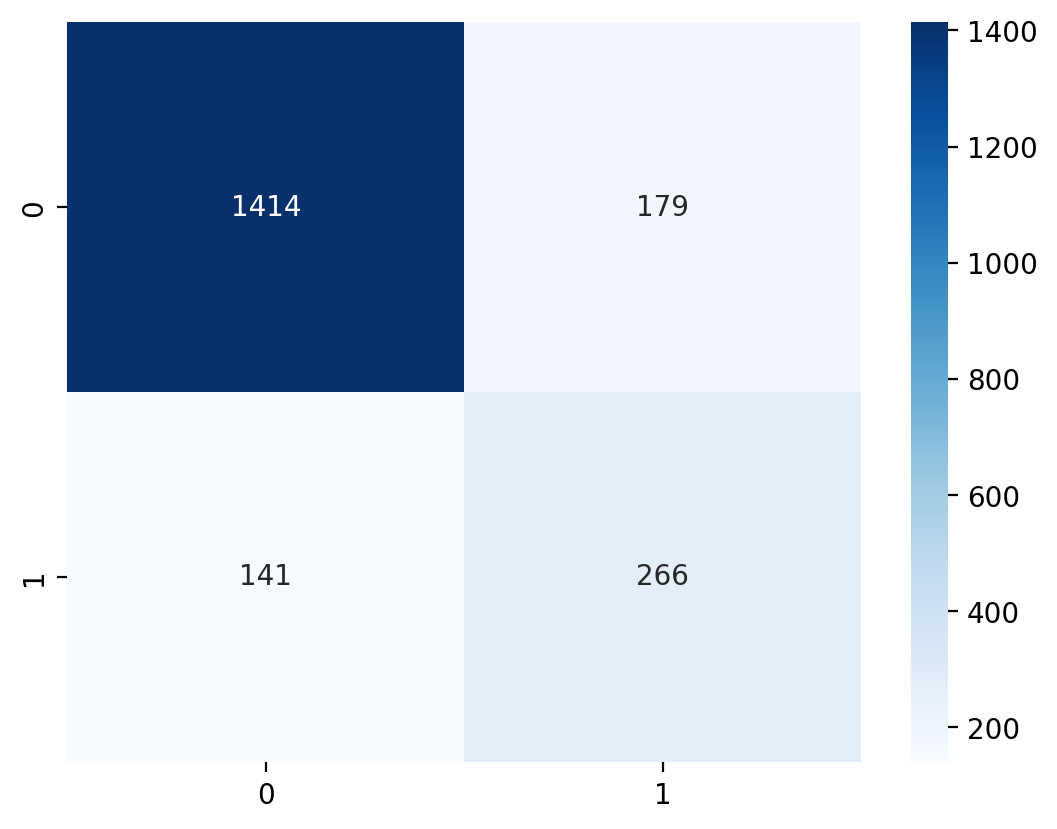

In [65]:
y_pred_rf = evaluate_model(final_rf, X_test, y_test)

## **`|` Extra Trees**

In [66]:
def objective_extratrees(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "warm_start": trial.suggest_categorical("warm_start", [True, False]),
        "class_weight": "balanced",
        "random_state": 42,
        "n_jobs": -1,
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []

    X_res = X_train_res.values if hasattr(X_train_res, "values") else X_train_res
    y_res = y_train_res.values if hasattr(y_train_res, "values") else y_train_res

    for train_idx, valid_idx in cv.split(X_res, y_res):
        X_tr, X_val = X_res[train_idx], X_res[valid_idx]
        y_tr, y_val = y_res[train_idx], y_res[valid_idx]

        model = ExtraTreesClassifier(**params)
        model.fit(X_tr, y_tr)

        y_pred = model.predict_proba(X_val)[:, 1]
        auc_scores.append(roc_auc_score(y_val, y_pred))

    return np.mean(auc_scores)


In [67]:
study_et = optuna.create_study(direction="maximize")
study_et.optimize(objective_extratrees, n_trials=50)

[I 2026-01-01 21:01:05,995] A new study created in memory with name: no-name-c123cca4-7489-4cf5-859d-616f8ff25363
[I 2026-01-01 21:01:14,282] Trial 0 finished with value: 0.8456766284246285 and parameters: {'n_estimators': 993, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 17, 'max_features': 'log2', 'bootstrap': True, 'warm_start': False}. Best is trial 0 with value: 0.8456766284246285.
[I 2026-01-01 21:01:18,404] Trial 1 finished with value: 0.8585445432181427 and parameters: {'n_estimators': 505, 'max_depth': 27, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True, 'warm_start': False}. Best is trial 1 with value: 0.8585445432181427.
[I 2026-01-01 21:01:22,100] Trial 2 finished with value: 0.837404123786395 and parameters: {'n_estimators': 420, 'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True, 'warm_start': False}. Best is trial 1 with value: 0.8585445432181427.
[I 2026-01-0

In [68]:
best_et_params = study_et.best_params
print("Best AUC:", study_et.best_value)
print(best_et_params)

Best AUC: 0.8619804475789834
{'n_estimators': 715, 'max_depth': 9, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True, 'warm_start': False}


In [69]:
optuna.visualization.plot_param_importances(study_rf).show()
optuna.visualization.plot_optimization_history(study_rf).show()

In [70]:
final_et = ExtraTreesClassifier(
    **best_et_params,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

In [71]:
final_et.fit(X_train_res, y_train_res)

ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_depth=9,
                     max_features=None, min_samples_split=15, n_estimators=715,
                     n_jobs=-1, random_state=42)

Accuracy:          0.8175
Balanced Accuracy: 0.7793
F1 Score:          0.6146
ROC AUC:           0.8613
Confusion Matrix:
[[1344  249]
 [ 116  291]]

              precision    recall  f1-score   support

           0      0.921     0.844     0.880      1593
           1      0.539     0.715     0.615       407

    accuracy                          0.818      2000
   macro avg      0.730     0.779     0.748      2000
weighted avg      0.843     0.818     0.826      2000



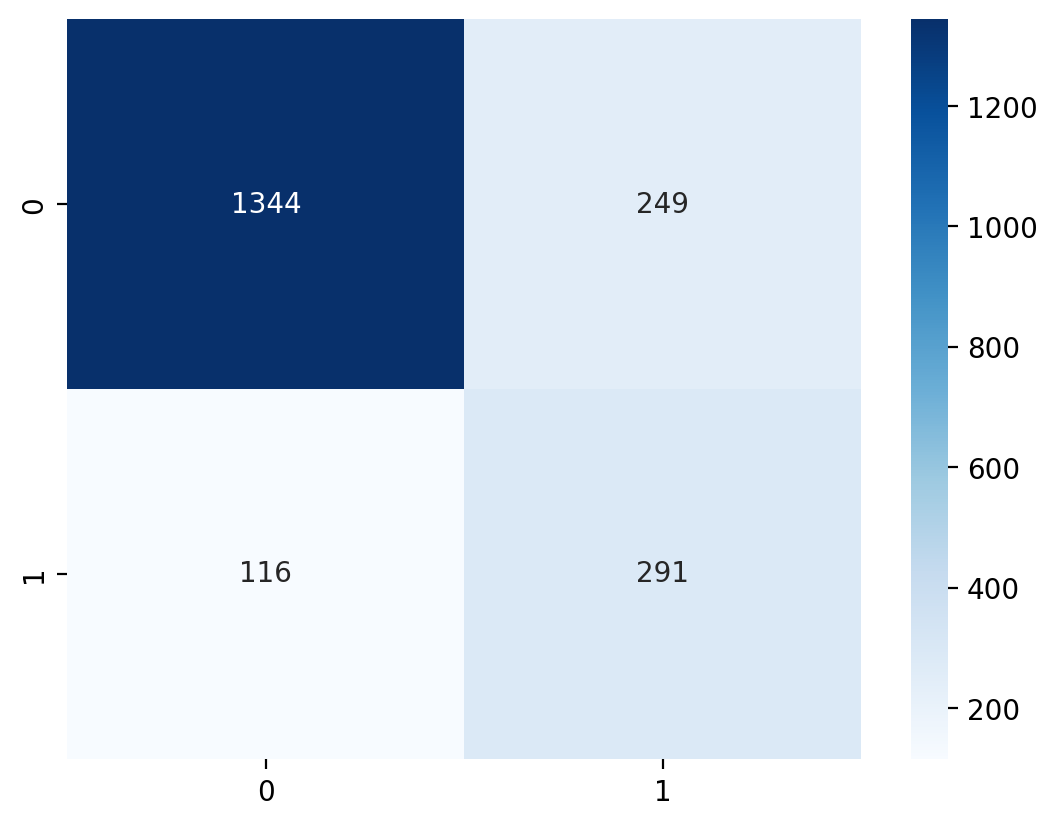

In [72]:
y_pred_et = evaluate_model(final_et, X_test, y_test)

<p style="font-size: 28px; color: #2c2c2c; font-family: 'Times New Roman'; text-align: left; background-color: #f5f5f5; border-radius: 4px; padding: 10px; border-left: 6px solid #555;">
<strong>Conclucion</strong>
</p>

## **`|` Comparison Table**

In [73]:
def get_cm_values(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn, fp, fn, tp

y_pred_xgb = (y_proba_xgb > best_t).astype(int)
y_pred_rf  = final_rf.predict(X_test)
y_pred_et  = final_et.predict(X_test)


results = pd.DataFrame({
    "Model Name": ["XGBoost", "Random Forest", "Extra Trees"],

    "True Negative": [
        get_cm_values(y_test, y_pred_xgb)[0],
        get_cm_values(y_test, y_pred_rf)[0],
        get_cm_values(y_test, y_pred_et)[0]
    ],

    "False Positive": [
        get_cm_values(y_test, y_pred_xgb)[1],
        get_cm_values(y_test, y_pred_rf)[1],
        get_cm_values(y_test, y_pred_et)[1]
    ],

    "False Negative": [
        get_cm_values(y_test, y_pred_xgb)[2],
        get_cm_values(y_test, y_pred_rf)[2],
        get_cm_values(y_test, y_pred_et)[2]
    ],

    "True Positive": [
        get_cm_values(y_test, y_pred_xgb)[3],
        get_cm_values(y_test, y_pred_rf)[3],
        get_cm_values(y_test, y_pred_et)[3]
    ],

    "Accuracy": [
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_et)
    ],

    "F1 Score": [
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_et)
    ],

    "ROC AUC": [
        roc_auc_score(y_test, y_proba_xgb),
        roc_auc_score(y_test, final_rf.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, final_et.predict_proba(X_test)[:,1])
    ]
}).round(4)


display(results.style.background_gradient(cmap="Blues"))


## **`|` Save Model**

In [74]:
import pickle

with open('churn.pkl', 'wb') as f:
    pickle.dump(final_xgb, f)

<br>

<hr style="
  width: 40%;
  border: none;
  height: 1px;
  background-color: #e0e0e0;
">

<br>

<div style="text-align: center;">
   <span style="
     font-size: 4.2em;
     font-weight: 700;
     font-family: Arial, sans-serif;
     letter-spacing: 2px;
   ">
     THANK YOU
   </span>
</div>

<br>

<hr style="
  width: 40%;
  border: none;
  height: 1px;
  background-color: #e0e0e0;
">

<br>

<div style="text-align: center;">
   <a href="https://www.linkedin.com/in/omar-abdelaal-638919296"
      style="
        font-size: 1.4em;
        font-weight: 600;
        font-family: Arial, sans-serif;
        color: #0a66c2;
        text-decoration: none;
        transition: color 0.3s ease, transform 0.3s ease;
        display: inline-block;
      "
      onmouseover="this.style.color='#084c94'; this.style.transform='translateY(-2px)'"
      onmouseout="this.style.color='#0a66c2'; this.style.transform='translateY(0)'"
   >
      Omar Abdelaal
   </a>
</div>
